# Importing libraries and data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
# Define the path
path = "/Users/ol/anaconda_projects/2025_02 World University Rankings/02 Data/Prepared Data/df_times.csv"

# Import CSV
df_times = pd.read_csv(path)
df_times.head()

world_rank                            institution country  teaching  \
0         1.0                     Harvard University     USA      99.7   
1         2.0     California Institute of Technology     USA      97.7   
2         3.0  Massachusetts Institute of Technology     USA      97.8   
3         4.0                    Stanford University     USA      98.3   
4         5.0                   Princeton University     USA      90.9   

  international  research  citations income  students  student_staff  \
0          72.4      98.7       98.8   34.5    20.152            8.9   
1          54.6      98.0       99.9   83.7     2.243            6.9   
2          82.3      91.4       99.9   87.5    11.074            9.0   
3          29.5      98.1       99.2   64.3    15.596            7.8   
4          70.3      95.4       99.9      -     7.929            8.4   

   international_percent  year  score  female_ratio  male_ratio  
0                   25.0  2011   96.1          52.0        48.0  
1                   27.0  2011   96.0          33.0        67.0  
2                   33.0  2011   95.6          37.0        63.0  
3                   22.0  2011   94.3          42.0        58.0  
4                   27.0  2011   94.2          45.0        55.0

# Data prep for regression analysis

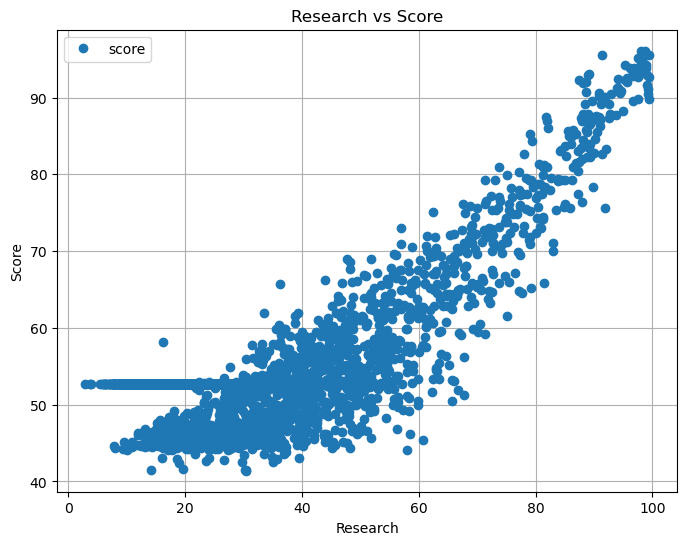

In [5]:
# Scatter plot of research vs score
df_times.plot(x='research', y='score', style='o', figsize=(8,6))  
plt.title('Research vs Score')  
plt.xlabel('Research')  
plt.ylabel('Score')  
plt.grid(True)  
plt.show()

In [39]:
# Reshape research and score columns into NumPy arrays
X = df_times['research'].values.reshape(-1, 1)  
y = df_times['score'].values.reshape(-1, 1)  

In [43]:
# Split data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Regression analysis

In [8]:
# Create a regression object
regression = LinearRegression()  

In [9]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [10]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

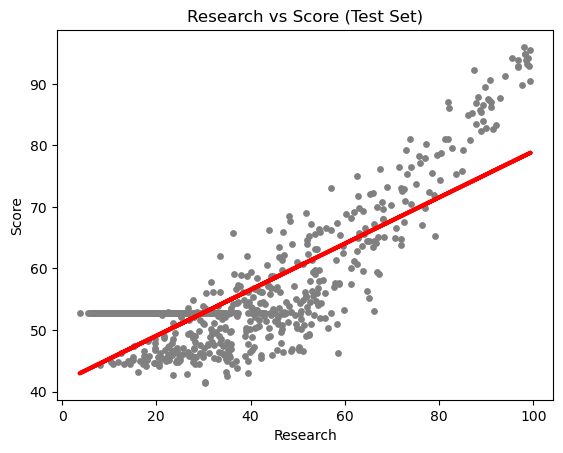

In [11]:
# Create a scatter plot of actual test data
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s=15)  # Test data points

# Plot the regression line
plot_test.plot(X_test, y_predicted, color='red', linewidth=3)  # Regression line

# Labels and title
plot_test.title('Research vs Score (Test Set)')
plot_test.xlabel('Research')
plot_test.ylabel('Score')

# Show the plot
plot_test.show()

In [12]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [13]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.37463549]]
Mean squared error:  38.56050375447514
R2 score:  0.6352483592973036


In [14]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

Actual  Predicted
0    52.70  45.648064
1    52.70  45.760455
2    52.70  50.031300
3    52.70  51.492378
4    52.90  59.771822
5    46.70  50.518326
6    52.70  50.106227
7    52.70  47.671096
8    48.80  57.936109
9    49.10  54.002436
10   94.90  78.353743
11   52.70  57.411619
12   55.30  56.737275
13   52.70  48.944857
14   46.99  52.054331
15   52.70  48.607685
16   45.30  54.601853
17   52.70  48.832466
18   52.90  59.209869
19   44.44  46.921825
20   47.36  47.296461
21   52.70  58.235817
22   52.70  47.895877
23   87.00  72.284648
24   52.70  57.299228
25   65.00  68.051267
26   52.70  48.645148
27   52.70  45.685528
28   45.00  54.639316
29   45.27  49.731591

In [46]:
# Predict.

y_predicted_train = regression.predict(X_train) 

In [16]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [17]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.37463549]]
Mean squared error:  34.121371653107964
R2 score:  0.6427649288552487


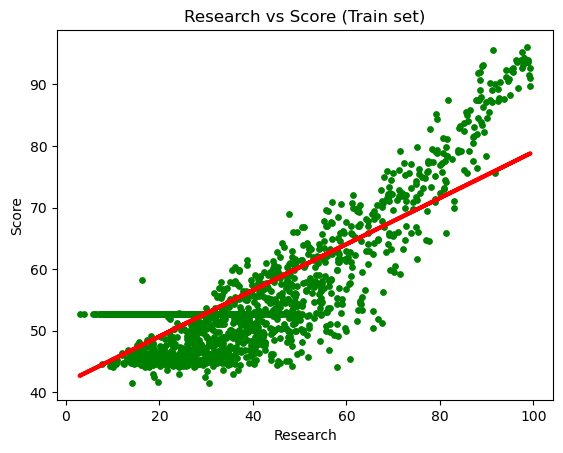

In [50]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Research vs Score (Train set)')
plot_test.xlabel('Research')
plot_test.ylabel('Score')
plot_test.show()

The model captures the overall positive correlation between Research and Score, performing well for mid-to-high research values. However, there is noticeable scatter around the regression line, indicating prediction errors. The model struggles with low-research universities (0-20), where actual scores do not align well with predictions.

Reflections on Data Bias:
The model assumes research alone determines university rankings, but other factors (teaching quality, citations) also matter.
The low-research universities with mid-range scores (~50) suggest institutional or ranking system bias.
The dataset is dominated by top universities (USA, UK), it may not generalize well to smaller or non-Western institutions.